In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
data = pd.read_csv("House_Rent_Dataset.csv")

In [53]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import r2_score

In [54]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4746 entries, 0 to 4745
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Posted On          4746 non-null   object
 1   BHK                4746 non-null   int64 
 2   Rent               4746 non-null   int64 
 3   Size               4746 non-null   int64 
 4   Floor              4746 non-null   object
 5   Area Type          4746 non-null   object
 6   Area Locality      4746 non-null   object
 7   City               4746 non-null   object
 8   Furnishing Status  4746 non-null   object
 9   Tenant Preferred   4746 non-null   object
 10  Bathroom           4746 non-null   int64 
 11  Point of Contact   4746 non-null   object
dtypes: int64(4), object(8)
memory usage: 445.1+ KB


In [55]:
data.describe()

,BHK,Rent,Size,Bathroom
count,4746.000000,4.746000e+03,4746.000000,4746.000000
mean,2.083860,3.499345e+04,967.490729,1.965866
std,0.832256,7.810641e+04,634.202328,0.884532
min,1.000000,1.200000e+03,10.000000,1.000000
25%,2.000000,1.000000e+04,550.000000,1.000000
50%,2.000000,1.600000e+04,850.000000,2.000000
75%,3.000000,3.300000e+04,1200.000000,2.000000
max,6.000000,3.500000e+06,8000.000000,10.000000


In [56]:
data.isnull().sum()

Posted On            0
BHK                  0
Rent                 0
Size                 0
Floor                0
Area Type            0
Area Locality        0
City                 0
Furnishing Status    0
Tenant Preferred     0
Bathroom             0
Point of Contact     0
dtype: int64

In [57]:
df = data.select_dtypes('O')
df

,Posted On,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Point of Contact
0,2022-05-18,Ground out of 2,Super Area,Bandel,Kolkata,Unfurnished,Bachelors/Family,Contact Owner
1,2022-05-13,1 out of 3,Super Area,"Phool Bagan, Kankurgachi",Kolkata,Semi-Furnished,Bachelors/Family,Contact Owner
2,2022-05-16,1 out of 3,Super Area,Salt Lake City Sector 2,Kolkata,Semi-Furnished,Bachelors/Family,Contact Owner
3,2022-07-04,1 out of 2,Super Area,Dumdum Park,Kolkata,Unfurnished,Bachelors/Family,Contact Owner
4,2022-05-09,1 out of 2,Carpet Area,South Dum Dum,Kolkata,Unfurnished,Bachelors,Contact Owner
...,...,...,...,...,...,...,...,...
4741,2022-05-18,3 out of 5,Carpet Area,Bandam Kommu,Hyderabad,Semi-Furnished,Bachelors/Family,Contact Owner
4742,2022-05-15,1 out of 4,Super Area,"Manikonda, Hyderabad",Hyderabad,Semi-Furnished,Bachelors/Family,Contact Owner
4743,2022-07-10,3 out of 5,Carpet Area,"Himayath Nagar, NH 7",Hyderabad,Semi-Furnished,Bachelors/Family,Contact Agent
4744,2022-07-06,23 out of 34,Carpet Area,Gachibowli,Hyderabad,Semi-Furnished,Family,Contact Agent


In [58]:
[(df.columns[i], df.iloc[:, i].unique().shape[0]) for i in range(len(df.columns))]

[('Posted On', 81),
 ('Floor', 480),
 ('Area Type', 3),
 ('Area Locality', 2235),
 ('City', 6),
 ('Furnishing Status', 3),
 ('Tenant Preferred', 3),
 ('Point of Contact', 3)]

In [59]:
data.drop(columns='Area Locality', inplace=True)
data["Total Floors"] = data["Floor"].apply(lambda floor:floor.split()[-1])
data["Floor"] = data["Floor"].apply(lambda floor:floor.split()[0])
data.head()

,Posted On,BHK,Rent,Size,Floor,Area Type,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact,Total Floors
0,2022-05-18,2,10000,1100,Ground,Super Area,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner,2
1,2022-05-13,2,20000,800,1,Super Area,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner,3
2,2022-05-16,2,17000,1000,1,Super Area,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner,3
3,2022-07-04,2,10000,800,1,Super Area,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner,2
4,2022-05-09,2,7500,850,1,Carpet Area,Kolkata,Unfurnished,Bachelors,1,Contact Owner,2


In [60]:
data.replace("Ground",0,inplace=True)
        

In [61]:
data.head()

,Posted On,BHK,Rent,Size,Floor,Area Type,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact,Total Floors
0,2022-05-18,2,10000,1100,0,Super Area,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner,2
1,2022-05-13,2,20000,800,1,Super Area,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner,3
2,2022-05-16,2,17000,1000,1,Super Area,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner,3
3,2022-07-04,2,10000,800,1,Super Area,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner,2
4,2022-05-09,2,7500,850,1,Carpet Area,Kolkata,Unfurnished,Bachelors,1,Contact Owner,2


In [62]:
data.duplicated().sum()

11

In [63]:
print(f"Mean house rent: {data.Rent.mean()}")
print(f"Median house rent: {data.Rent.median()}")
print(f"Maximum house rent: {data.Rent.max()}")
print(f"Minimum house rent: {data.Rent.min()}")

Mean house rent: 34993.45132743363
Median house rent: 16000.0
Maximum house rent: 3500000
Minimum house rent: 1200


In [64]:
data.Rent.sort_values(ascending=False)[0:5]

1837    3500000
1001    1200000
827     1000000
1329     850000
1459     700000
Name: Rent, dtype: int64

In [65]:
data.Rent.sort_values(ascending=True)[0:5]

4076    1200
285     1500
471     1800
2475    2000
146     2200
Name: Rent, dtype: int64

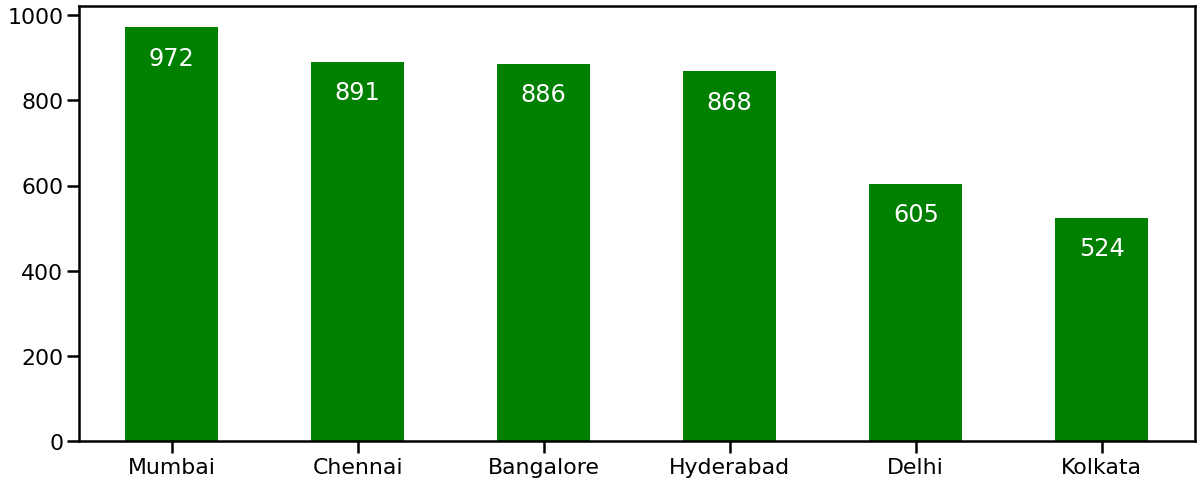

In [66]:
sns.set_context("poster")
plt.figure(figsize=(20,8))
ax = data.City.value_counts().plot(kind='bar',color='green',rot=0);

for p in ax.patches:
    ax.annotate(int(p.get_height()), (p.get_x() + 0.25, p.get_height() - 100), ha = 'center', va = 'bottom', color = 'white')

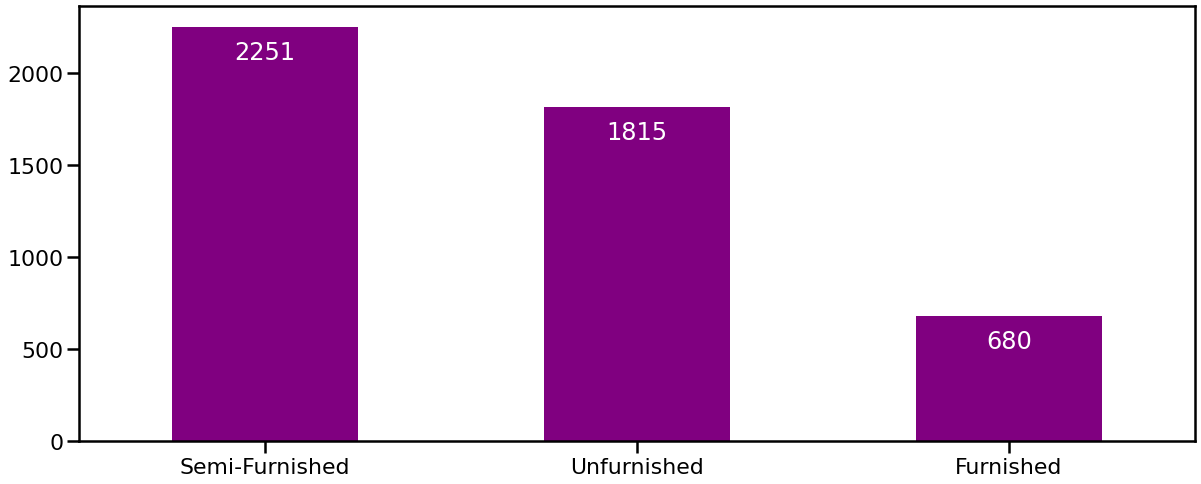

In [67]:
sns.set_context("poster")
plt.figure(figsize=(20,8))
ax = data["Furnishing Status"].value_counts().plot(kind='bar',color='purple',rot=0);

for p in ax.patches:
    ax.annotate(int(p.get_height()), (p.get_x() + 0.25, p.get_height() - 200), ha = 'center', va = 'bottom', color = 'white')

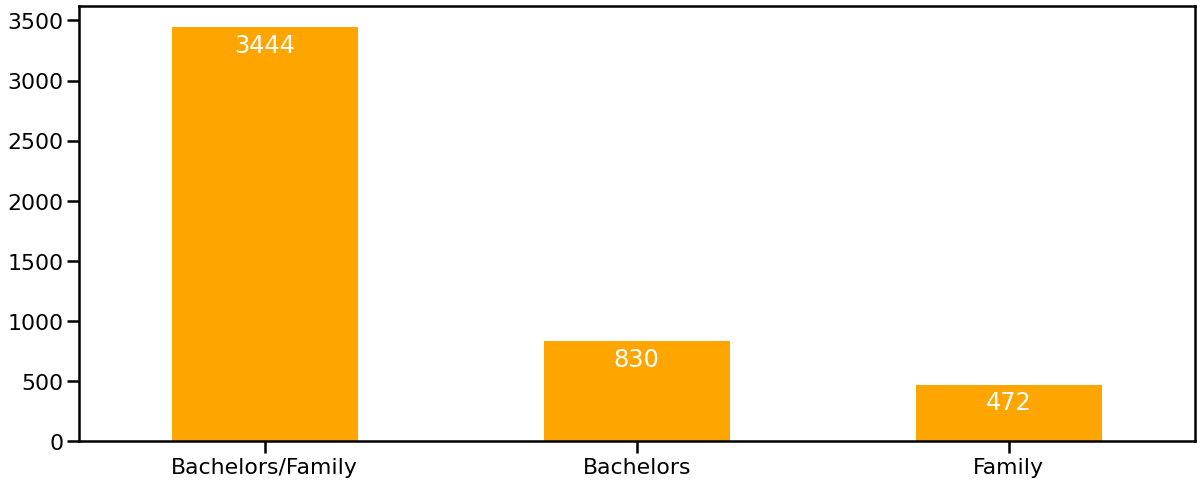

In [68]:
sns.set_context("poster")
plt.figure(figsize=(20,8))
ax = data['Tenant Preferred'].value_counts().plot(kind='bar',color='orange',rot=0);

for p in ax.patches:
    ax.annotate(int(p.get_height()), (p.get_x() + 0.25, p.get_height() - 250), ha = 'center', va = 'bottom', color = 'white')

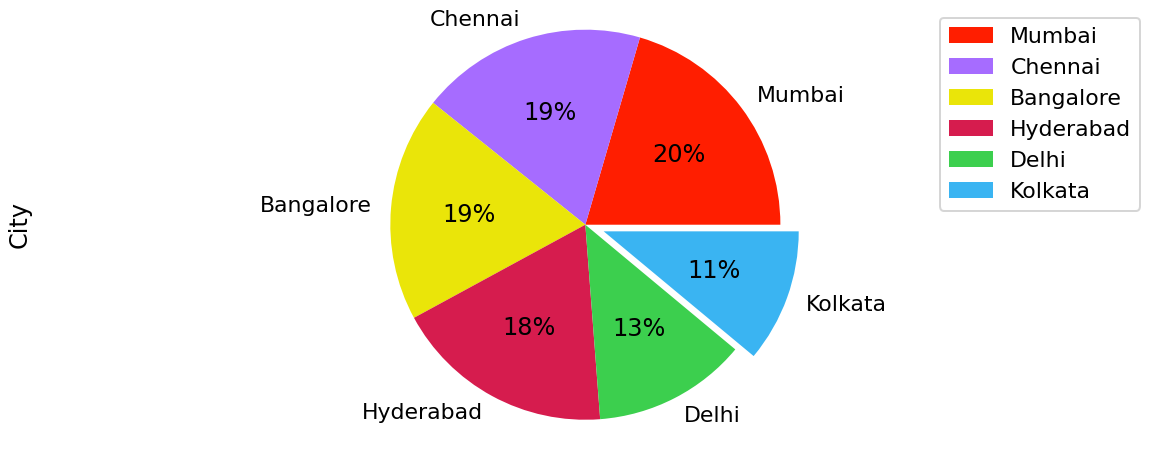

In [69]:
plt.figure(figsize=(20,8))
counts=data['City'].value_counts()
explode = (0, 0, 0, 0, 0, 0.1)
colors=['#FF1E00', '#A66CFF', '#EAE509', '#D61C4E', '#3CCF4E', '#3AB4F2']

counts.plot(kind='pie',colors=colors,explode = explode, autopct = '%1.f%%')

plt.axis('equal')
plt.legend(labels = counts.index)

In [70]:
data.columns

Index(['Posted On', 'BHK', 'Rent', 'Size', 'Floor', 'Area Type', 'City',
       'Furnishing Status', 'Tenant Preferred', 'Bathroom', 'Point of Contact',
       'Total Floors'],
      dtype='object')

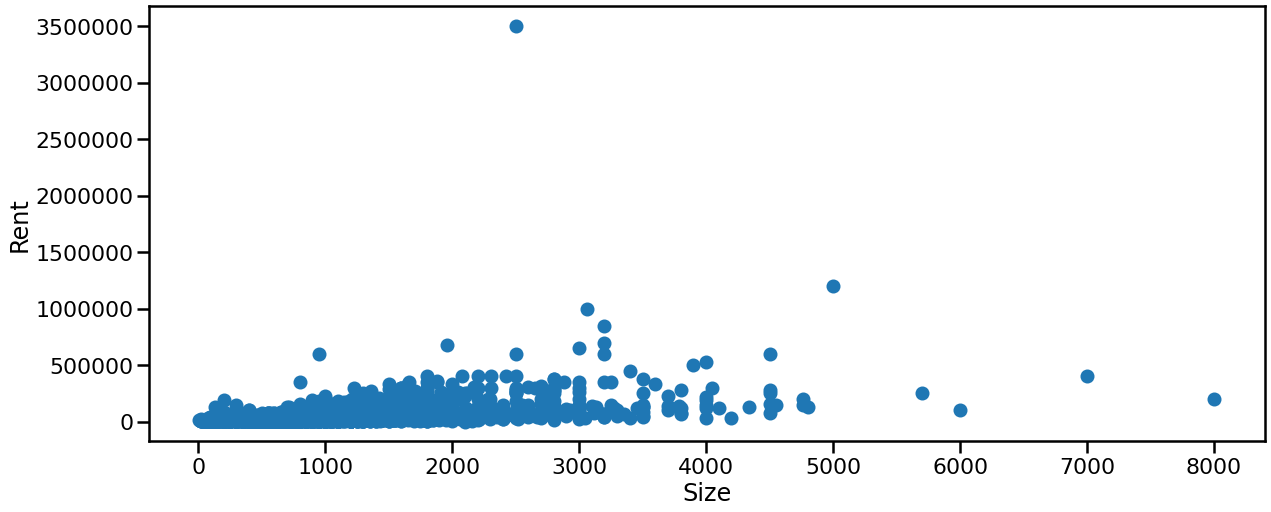

In [71]:
plt.figure(figsize=(20,8))
plt.ticklabel_format(style = 'plain')
plt.scatter(data["Size"], data["Rent"])
plt.xlabel("Size")
plt.ylabel("Rent");

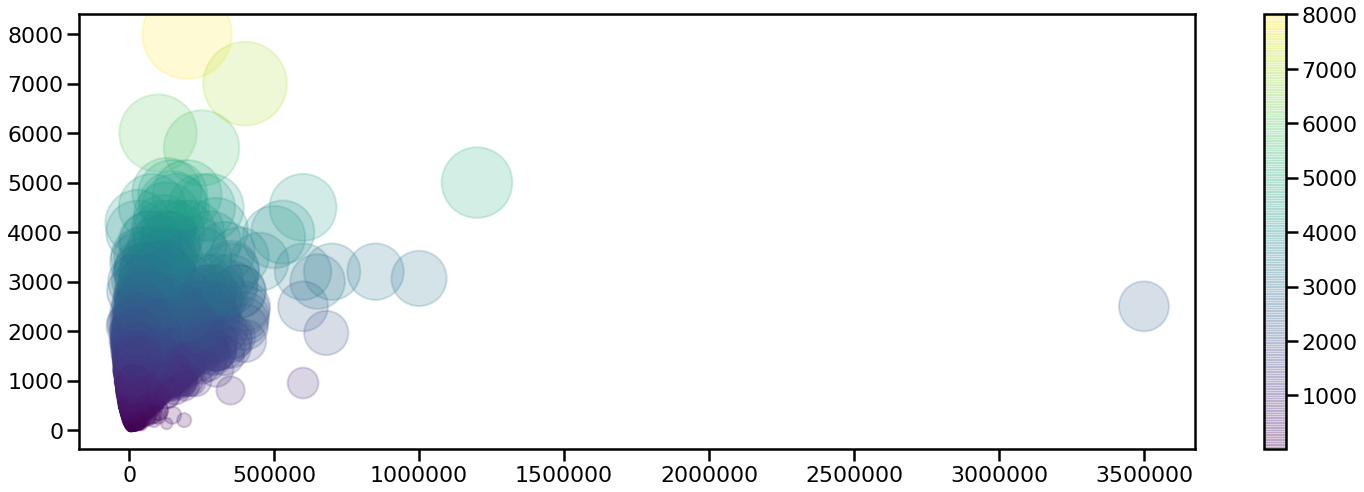

In [72]:
x = data["Rent"]
y = data["Size"]
colors = data["Size"]
sizes = data["Size"]

plt.figure(figsize = (25, 8))
plt.ticklabel_format(style = 'plain')
plt.scatter(x, y, c = colors, s = sizes, alpha = 0.2)
plt.colorbar();

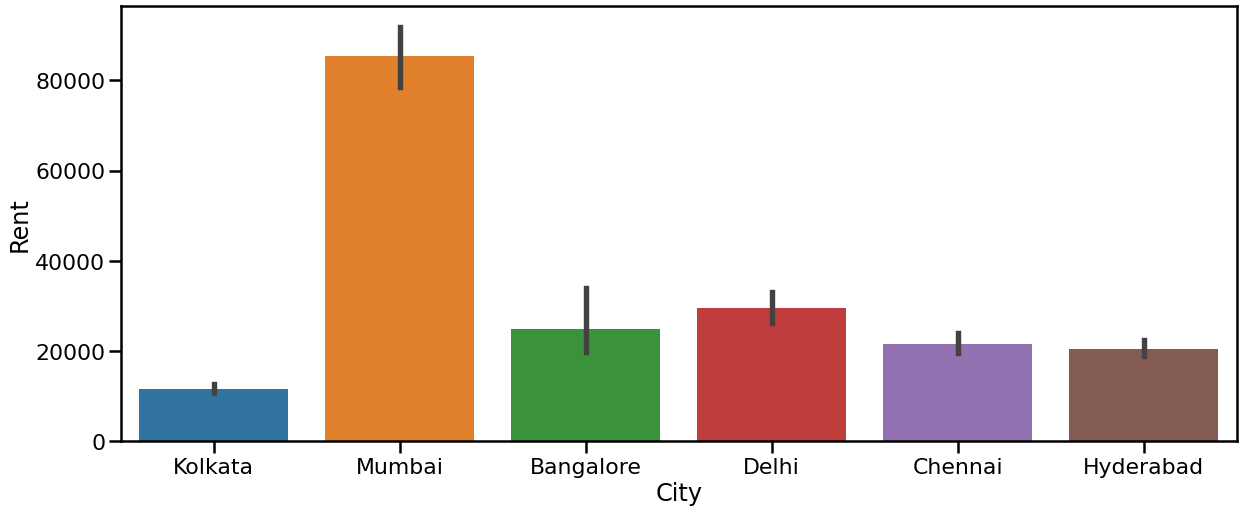

In [73]:
plt.figure(figsize=(20,8))
sns.barplot(x=data['City'],y=data["Rent"])
palette = "nipy_spectral"

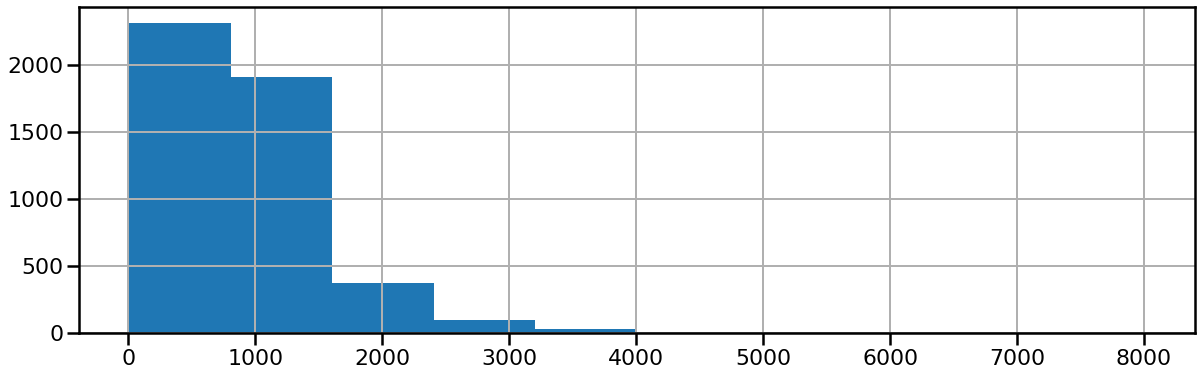

In [74]:
n_bins = 10
plt.figure(figsize = (20, 6))
data["Size"].hist(bins = n_bins);

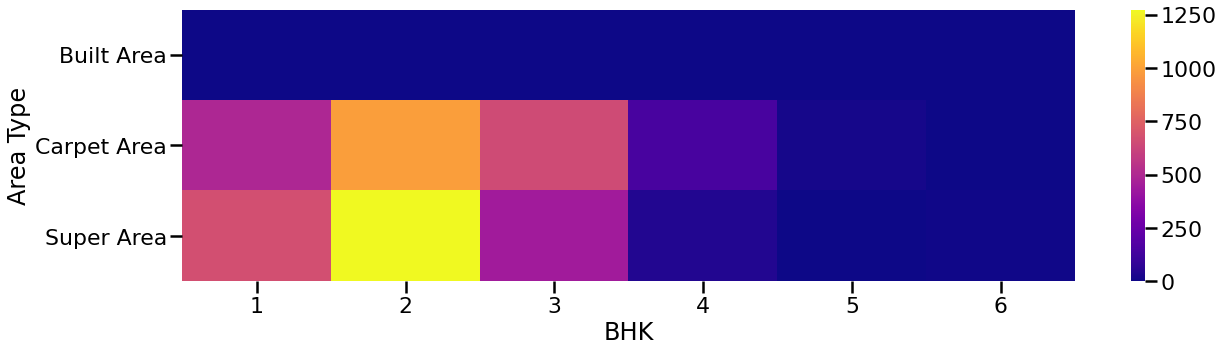

In [75]:
plt.figure(figsize = (20, 5))
colormap = plt.cm.plasma
sns.heatmap(pd.crosstab(data["Area Type"],data["BHK"]), cmap = colormap);

In [76]:
df1 = data.select_dtypes('O')
[print(df1.iloc[:, i].unique(), '\n') for i in range(len(df1.columns))]

encodes = {"Floor":     {"Ground": 0, "Upper": 999, "Lower": -1},
           "Total Floors": {"Ground": 0}}

data = data.replace(encodes)
data.head()

['2022-05-18' '2022-05-13' '2022-05-16' '2022-07-04' '2022-05-09'
 '2022-04-29' '2022-06-21' '2022-06-07' '2022-06-20' '2022-05-23'
 '2022-05-14' '2022-05-05' '2022-06-01' '2022-05-17' '2022-06-09'
 '2022-07-02' '2022-06-14' '2022-06-15' '2022-05-28' '2022-05-22'
 '2022-06-18' '2022-06-25' '2022-06-22' '2022-05-21' '2022-06-26'
 '2022-06-16' '2022-06-29' '2022-05-10' '2022-05-12' '2022-06-03'
 '2022-05-31' '2022-06-10' '2022-06-24' '2022-04-30' '2022-05-27'
 '2022-06-06' '2022-05-20' '2022-05-26' '2022-07-03' '2022-04-23'
 '2022-06-19' '2022-07-06' '2022-06-04' '2022-05-30' '2022-06-08'
 '2022-05-03' '2022-05-07' '2022-06-27' '2022-05-15' '2022-04-28'
 '2022-06-28' '2022-06-23' '2022-06-13' '2022-05-04' '2022-04-25'
 '2022-05-06' '2022-06-30' '2022-07-01' '2022-06-17' '2022-06-11'
 '2022-05-11' '2022-06-12' '2022-06-05' '2022-05-25' '2022-05-24'
 '2022-05-19' '2022-04-24' '2022-04-27' '2022-05-08' '2022-04-26'
 '2022-06-02' '2022-05-29' '2022-07-07' '2022-07-08' '2022-07-09'
 '2022-07-

,Posted On,BHK,Rent,Size,Floor,Area Type,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact,Total Floors
0,2022-05-18,2,10000,1100,0,Super Area,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner,2
1,2022-05-13,2,20000,800,1,Super Area,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner,3
2,2022-05-16,2,17000,1000,1,Super Area,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner,3
3,2022-07-04,2,10000,800,1,Super Area,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner,2
4,2022-05-09,2,7500,850,1,Carpet Area,Kolkata,Unfurnished,Bachelors,1,Contact Owner,2


In [77]:
data = pd.get_dummies(data, columns=['Area Type', 'City', 'Furnishing Status', 'Tenant Preferred', 'Point of Contact'])
data.head()

,Posted On,BHK,Rent,Size,Floor,Bathroom,Total Floors,Area Type_Built Area,Area Type_Carpet Area,Area Type_Super Area,...,City_Mumbai,Furnishing Status_Furnished,Furnishing Status_Semi-Furnished,Furnishing Status_Unfurnished,Tenant Preferred_Bachelors,Tenant Preferred_Bachelors/Family,Tenant Preferred_Family,Point of Contact_Contact Agent,Point of Contact_Contact Builder,Point of Contact_Contact Owner
0,2022-05-18,2,10000,1100,0,2,2,0,0,1,...,0,0,0,1,0,1,0,0,0,1
1,2022-05-13,2,20000,800,1,1,3,0,0,1,...,0,0,1,0,0,1,0,0,0,1
2,2022-05-16,2,17000,1000,1,1,3,0,0,1,...,0,0,1,0,0,1,0,0,0,1
3,2022-07-04,2,10000,800,1,1,2,0,0,1,...,0,0,0,1,0,1,0,0,0,1
4,2022-05-09,2,7500,850,1,1,2,0,1,0,...,0,0,0,1,1,0,0,0,0,1


In [78]:
data.drop(columns='Posted On', inplace=True)

In [79]:
data.corr()['Rent'].sort_values(ascending=False)

Rent                                 1.000000
Bathroom                             0.441215
Size                                 0.413551
BHK                                  0.369718
Point of Contact_Contact Agent       0.339750
City_Mumbai                          0.327038
Area Type_Carpet Area                0.215769
Furnishing Status_Furnished          0.110576
Tenant Preferred_Family              0.063941
Furnishing Status_Semi-Furnished     0.045309
Tenant Preferred_Bachelors           0.042151
Point of Contact_Contact Builder    -0.005482
Area Type_Built Area                -0.006439
City_Delhi                          -0.027072
City_Bangalore                      -0.061512
Tenant Preferred_Bachelors/Family   -0.078774
City_Chennai                        -0.082361
City_Hyderabad                      -0.087465
City_Kolkata                        -0.105322
Furnishing Status_Unfurnished       -0.126271
Area Type_Super Area                -0.215499
Point of Contact_Contact Owner    

In [80]:
X = data.drop(columns=['Rent'], axis=1)
y = data['Rent']

In [81]:
X.shape, y.shape

((4746, 23), (4746,))

In [82]:
X, y = X.astype('int64'),y.astype('int64')

In [83]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [84]:
y_train.shape,y_test.shape

((3796,), (950,))

In [85]:
y_train = np.array(y_train).reshape(y_train.shape[0], 1)
mms_X = MinMaxScaler()
mms_y = MinMaxScaler()
X_train = mms_X.fit_transform(X_train)
y_train = mms_y.fit_transform(y_train)

In [111]:
model = RandomForestRegressor(n_estimators=800,max_depth=50,min_samples_leaf=3,min_samples_split= 5,random_state=42)

In [112]:
model.fit(X_train,y_train)

<ipython-input-112-b7a8c64777c1>:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train,y_train)


RandomForestRegressor(max_depth=50, min_samples_leaf=3, min_samples_split=5,
                      n_estimators=800, random_state=42)

In [113]:
y_pred = model.predict(mms_X.transform(X_test.values))

In [114]:
y_pred = mms_y.inverse_transform(y_pred.reshape(len(y_test), 1))
np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.values.reshape(len(y_test),1)),1))

[[17381.53 16000.  ]
 [13240.41 12000.  ]
 [27867.11 28000.  ]
 ...
 [15055.69 14000.  ]
 [17305.76 26000.  ]
 [13600.15 11000.  ]]


In [115]:
r2_score(y_pred, y_test)

0.5453238381609962